# [1] Método de Euler via planilha eletrônica

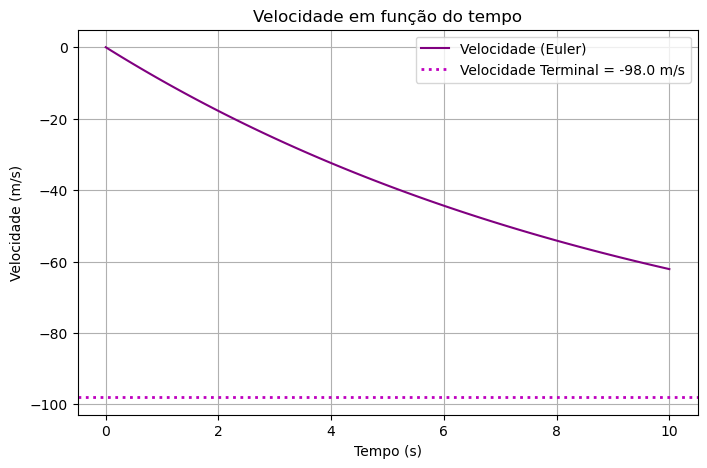

In [5]:
# 1d. Refaça o mesmo problema acima, mas agora em python usando arrays
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
g = 9.8       # aceleração da gravidade (m/s²)
b = 0.1       # coeficiente de arrasto (kg/s)
m = 1.0       # massa do corpo (kg)
v0 = 0.0      # velocidade inicial (m/s)
dt = 0.1      
n_steps = 100 # número de passos


t = np.zeros(n_steps + 1)
v = np.zeros(n_steps + 1)

# Condição inicial
t[0] = 0.0
v[0] = v0

# Método de Euler
for n in range(n_steps):
    dvdt = -g - (b / m) * v[n]
    v[n+1] = v[n] + dvdt * dt
    t[n+1] = t[n] + dt

# Velocidade terminal teórica
v_terminal = - (g * m) / b


plt.figure(figsize=(8, 5))
plt.plot(t, v, 'purple', label='Velocidade (Euler)')
plt.axhline(y=v_terminal, color='m', linestyle=':', linewidth=2, label=f'Velocidade Terminal = {v_terminal:.1f} m/s')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade em função do tempo')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#1e( método runge kutta)
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
g = 9.8       # aceleração da gravidade (m/s²)
b = 0.1       # coeficiente de arrasto (kg/s)
m = 1.0       # massa do corpo (kg)
v0 = 0.0      # velocidade inicial (m/s)
dt_values = [0.1, 0.5, 0.10] 
n_steps = 100  # Número de passos

def metodo_de_euler (dt):
    t = np.zeros(n_steps + 1)
    v = np.zeros(n_steps + 1)
    

    
    


